In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [7]:
scantronMath_38_df = pd.read_csv('../dataframes/scantronMath_38.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [8]:
scantronMath_38_df.head(10)

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

In [9]:
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
course_AIDELIB7-8NC                bool
course_AIDSTU6-12NC                bool
course_ARTHIS7-8                   bool
course_Advisory 5                  bool
course_Advisory 6                  bool
course_Advisory 7                  bool
course_Advisory 7-8                bool
course_Advisory 8                  bool
course_Aide Off 7-8                bool
course_BAND 6                      bool
course_BAND 7 Brass                bool
course_BAND 7 Percu                bool
course_BAND 7 Wood                 bool
course_BROADCAS 7-8                bool
course_Band 7                      bool
course_Band7                       bool
course_BandGuitar78                bool
course_CONTISSU 7-8                bool
course_CREAWRT 7-8                 bool
course_CSElec Gr7-8                bool


In [10]:
scantronMath_38_df[scantronMath_38_df.select_dtypes(include=['bool']).columns] = scantronMath_38_df.select_dtypes(include=['bool']).astype(int)
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int64
proficient_score                float64
course_AIDELIB7-8NC               int64
course_AIDSTU6-12NC               int64
course_ARTHIS7-8                  int64
course_Advisory 5                 int64
course_Advisory 6                 int64
course_Advisory 7                 int64
course_Advisory 7-8               int64
course_Advisory 8                 int64
course_Aide Off 7-8               int64
course_BAND 6                     int64
course_BAND 7 Brass               int64
course_BAND 7 Percu               int64
course_BAND 7 Wood                int64
course_BROADCAS 7-8               int64
course_Band 7                     int64
course_Band7                      int64
course_BandGuitar78               int64
course_CONTISSU 7-8               int64
course_CREAWRT 7-8                int64
course_CSElec Gr7-8               int64


In [11]:
scantronMath_38_df.isnull().sum()

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
course_AIDELIB7-8NC                0
course_AIDSTU6-12NC                0
course_ARTHIS7-8                   0
course_Advisory 5                  0
course_Advisory 6                  0
course_Advisory 7                  0
course_Advisory 7-8                0
course_Advisory 8                  0
course_Aide Off 7-8                0
course_BAND 6                      0
course_BAND 7 Brass                0
course_BAND 7 Percu                0
course_BAND 7 Wood                 0
course_BROADCAS 7-8                0
course_Band 7                      0
course_Band7                       0
course_BandGuitar78                0
course_CONTISSU 7-8                0
course_CREAWRT 7-8                 0
course_CSElec Gr7-8                0
course_CareerPrep-A                0
course_CareerPrepA5                0
c

In [12]:
#dropping rows that are missing past proficient score
scantronMath_38_df = scantronMath_38_df.dropna(subset=['past_proficient_score'])
print(scantronMath_38_df.isnull().sum()) 

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
course_AIDELIB7-8NC             0
course_AIDSTU6-12NC             0
course_ARTHIS7-8                0
course_Advisory 5               0
course_Advisory 6               0
course_Advisory 7               0
course_Advisory 7-8             0
course_Advisory 8               0
course_Aide Off 7-8             0
course_BAND 6                   0
course_BAND 7 Brass             0
course_BAND 7 Percu             0
course_BAND 7 Wood              0
course_BROADCAS 7-8             0
course_Band 7                   0
course_Band7                    0
course_BandGuitar78             0
course_CONTISSU 7-8             0
course_CREAWRT 7-8              0
course_CSElec Gr7-8             0
course_CareerPrep-A             0
course_CareerPrepA5             0
course_CivicH/Adv 7             0
course_CivicsGr 7               0
course_ContIss

PCA

In [13]:
# Initialize scaler and scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scantronMath_38_df.drop(['proficient_score','is_proficient','studentId','dataSource','level'], axis=1))

# Perform PCA
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8048849451554497


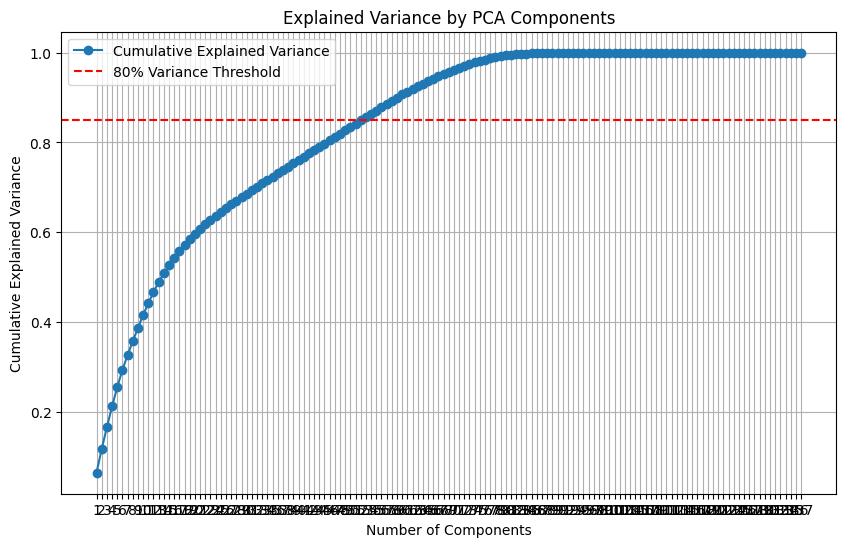

Number of components needed: 46


In [14]:
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")

In [15]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
first_47_pcs_df = X_pca_df.iloc[:, :47].copy()

In [16]:
print(pca.components_.shape)
print(scantronMath_38_df.columns)

cols_drop = ['proficient_score','is_proficient','studentId','dataSource','level']
columns_to_drop = [col for col in cols_drop if col in scantronMath_38_df.columns]
feature_names = scantronMath_38_df.drop(columns=columns_to_drop).columns

(137, 137)
Index(['studentId', 'level', 'dataSource', 'is_proficient', 'proficient_score',
       'course_AIDELIB7-8NC', 'course_AIDSTU6-12NC', 'course_ARTHIS7-8',
       'course_Advisory 5', 'course_Advisory 6',
       ...
       'school_Elementary School F', 'school_Intermediate School E',
       'school_Middle School A', 'school_Middle School C',
       'school_Middle School D', 'school_Middle School F', 'iready_math',
       'iready_reading', 'bbb_literacy', 'past_proficient_score'],
      dtype='object', length=142)


In [17]:
components = pca.components_[:47]  
# Create a DataFrame for feature loadings
# Rows correspond to features, and columns correspond to principal components
feature_loadings_df = pd.DataFrame(
    components.T,  # Transpose to match features as rows
    columns=[f'PC{i+1}' for i in range(components.shape[0])],  # PC1, PC2, ..., PC108
    index= feature_names  # Feature names
)

# Initialize a list to store the top features across all principal components
all_top_features = []

# For each principal component, find the top features
for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Get the top 5 features for the current principal component (adjustable)
    top_features = sorted_features.head(5).index.tolist()
    # Add the component and its top features to the list
    for feature in top_features:
        all_top_features.append((pc, feature))

# Create a DataFrame to view all top features for each principal component
top_features_df = pd.DataFrame(all_top_features, columns=['Principal Component', 'Top Feature'])

# Display the DataFrame
print(top_features_df)

    Principal Component                   Top Feature
0                   PC1               course_HOMEROOM
1                   PC1                  course_HWK-4
2                   PC1              course_SCIENCE 3
3                   PC1                   course_PE 3
4                   PC1               course_SOC ST 3
5                   PC2             course_CivicsGr 7
6                   PC2               course_Geog Gr7
7                   PC2           course_English Gr 7
8                   PC2                 course_Math 7
9                   PC2            course_LifeSci Gr7
10                  PC3            course_WLDHIS 1500
11                  PC3            course_PhySci Gr 8
12                  PC3           course_English Gr 8
13                  PC3           course_Survey Elec8
14                  PC3           course_Math8 PreAlg
15                  PC4                 course_MATH 4
16                  PC4             course_LANGUAGE 4
17                  PC4     

In [18]:
top_features_df.head(15)

,Principal Component,Top Feature
0,PC1,course_HOMEROOM
1,PC1,course_HWK-4
2,PC1,course_SCIENCE 3
3,PC1,course_PE 3
4,PC1,course_SOC ST 3
5,PC2,course_CivicsGr 7
6,PC2,course_Geog Gr7
7,PC2,course_English Gr 7
8,PC2,course_Math 7
9,PC2,course_LifeSci Gr7


In [19]:
# Find the most positively and negatively correlated features with each principal component
positive_correlations = {}
negative_correlations = {}

# Iterate through the loadings for each component
for pc in feature_loadings_df.columns:
    # Get the features with positive correlations (largest positive values)
    positive_features = feature_loadings_df[pc][feature_loadings_df[pc] > 0].sort_values(ascending=False)
    negative_features = feature_loadings_df[pc][feature_loadings_df[pc] < 0].sort_values(ascending=True)
    
    # Store the positive and negative correlations
    positive_correlations[pc] = positive_features
    negative_correlations[pc] = negative_features

# Print the results
print("Positive Correlations:")
for pc, features in positive_correlations.items():
    print(f"{pc}: {features.head()}")  # Display top 5 positively correlated features

print("\nNegative Correlations:")
for pc, features in negative_correlations.items():
    print(f"{pc}: {features.head()}")  # Display top 5 negatively correlated features

Positive Correlations:
PC1: course_HOMEROOM     0.227592
course_HWK-4        0.211502
course_PE 3         0.207644
course_SOC ST 3     0.207644
course_SCIENCE 3    0.207644
Name: PC1, dtype: float64
PC2: course_CivicsGr 7      0.269627
course_Geog Gr7        0.269525
course_English Gr 7    0.267761
course_Math 7          0.226014
course_LifeSci Gr7     0.213322
Name: PC2, dtype: float64
PC3: course_PhySci Gr 8     0.382849
course_WLDHIS 1500     0.382849
course_English Gr 8    0.382849
course_Survey Elec8    0.313211
course_Math8 PreAlg    0.313211
Name: PC3, dtype: float64
PC4: course_LANGUAGE 4    0.292067
course_MATH 4        0.292067
course_SOC ST 4      0.292067
course_SCIENCE 4     0.292067
course_READING 4     0.292067
Name: PC4, dtype: float64
PC5: course_EnrichmtP6         0.300863
school_Middle School A    0.265580
course_English LA 5       0.265322
course_Science Gr 5       0.262945
course_SocialStuGr5       0.257655
Name: PC5, dtype: float64
PC6: course_MATH 6          0.34

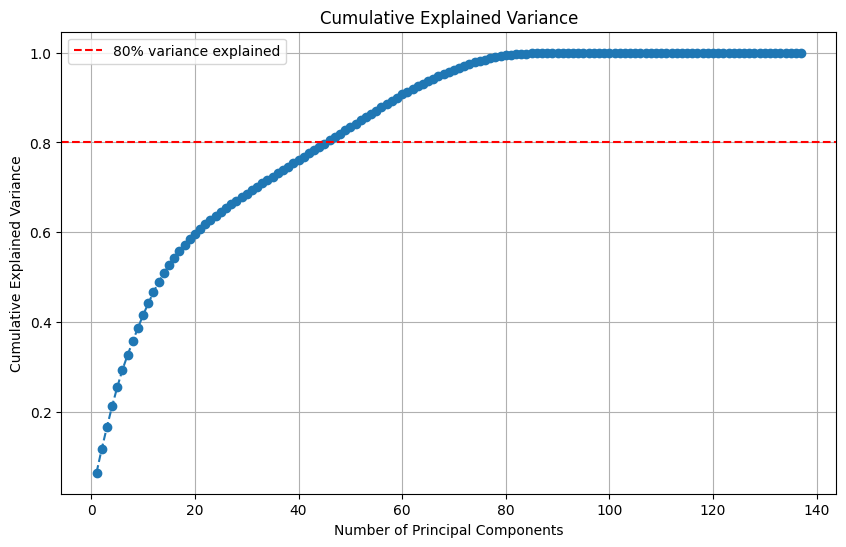

In [20]:
# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Training PCA

In [21]:
X = first_47_pcs_df  # PCA-transformed features
y = scantronMath_38_df['proficient_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print(X_train.shape)

(12119, 47)


In [22]:
#possible hyperparameters
max_depth_values= [8,12,25,32]
min_samples_leaf_values = [4,5,8,10]
param_grid = {'max_depth' : list(max_depth_values), 'min_samples_leaf' : list(min_samples_leaf_values)}


#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print("Done")
dt_best_params = dt_grid_search.best_params_

dt_best_params

Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [23]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model.fit(X_train,y_train)

#testing model on the X_test
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test,y_dt_pred,squared=False)
dt_r2 = r2_score(y_test,y_dt_pred)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_bool = y_dt_pred >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      2078
        True       0.81      0.73      0.77       952

    accuracy                           0.86      3030
   macro avg       0.85      0.83      0.84      3030
weighted avg       0.86      0.86      0.86      3030

[DT] Root Mean Squared Error: 0.05140455605085214
[DT] R2: 0.5328247535249825


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.8623762376237624
